In [1]:
# https://www.geeksforgeeks.org/ml-using-svm-to-perform-classification-on-a-non-linear-dataset/

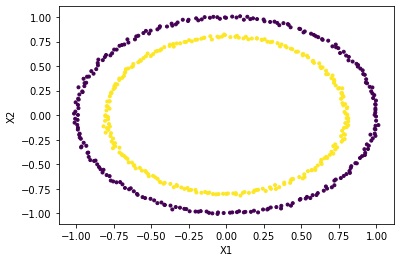

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
  
# generating data
X, Y = make_circles(n_samples = 500, noise = 0.01)
  
# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

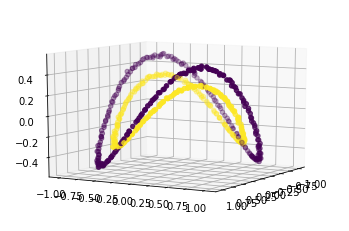

In [3]:
# adding a new dimension to X
X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))

# X1, X2를 이용하여 새로운 feature 생성 -> 이 부분만 수정하여 변환해볼 것
############ TODO ############
new_X1 = X1
new_X2 = X2
new_X3 = X1 * X2
############ TODO ############

X = np.hstack((new_X1, new_X2, new_X3))
  
# visualizing data in higher dimension
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(X[:,0], X[:,1], X[:,2], c = Y, depthshade = True)
axes.view_init(10, 30) # view angle 조절
plt.show()

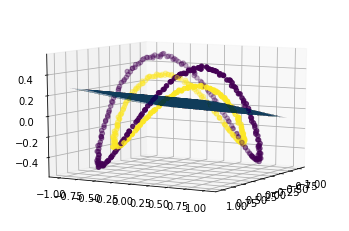

In [4]:
# create support vector classifier using a linear kernel
from sklearn import svm
  
svc = svm.SVC(kernel = 'linear')
svc.fit(X, Y)
w = svc.coef_
b = svc.intercept_
  
# plotting the separating hyperplane
x1, x2 = np.meshgrid(new_X1, new_X2)
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2]
  
fig = plt.figure()
axes2 = fig.add_subplot(111, projection = '3d')
axes2.scatter(new_X1, new_X2, new_X3, c = Y, depthshade = True)
axes1 = fig.gca(projection = '3d')
axes1.plot_surface(x1, x2, x3, alpha = 0.01)
axes1.view_init(10, 30) # view angle 조절
plt.show()